In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import pathlib
import datetime
import time


In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


## Importing images

In [ ]:
data_dir='/content/drive/MyDrive/NTU/CE4042/classified_images'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/NTU/CE4042/classified_images')

In [ ]:
batch_size = 32
img_height = 256
img_width = 256
#split data into train and validation dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 12676 files belonging to 2 classes.
Using 11409 files for training.
Found 12676 files belonging to 2 classes.
Using 1267 files for validation.


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Importing model to predict gender

In [ ]:
export_path_gender="/content/drive/MyDrive/Colab Notebooks/1636800444"
model_gender = tf.keras.models.load_model(export_path_gender)

In [ ]:
model_gender.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 22,065,314
Trainable params: 22,030,882
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
predicted_batch_gender = model_gender.predict(image_batch)
predicted_id_gender = tf.math.argmax(predicted_batch_gender, axis=-1)
predicted_id_gender
predicted_label_batch_gender=[]
for i in predicted_id_gender.numpy():
    if(i==1):
        predicted_label_batch_gender.append("male")
    else:
        predicted_label_batch_gender.append("female")
print(predicted_label_batch_gender)

['male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female']


### Importing model to predict Age

In [ ]:
export_path_age="/content/drive/MyDrive/Colab Notebooks/1636862553"
model_age = tf.keras.models.load_model(export_path_age)

In [ ]:
model_age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
predicted_batch_age = model_age.predict(image_batch)
predicted_id_age = tf.math.argmax(predicted_batch_age, axis=-1)
predicted_id_age
predicted_label_batch_age=[]
for i in predicted_id_age.numpy():
    if(i==0):
        predicted_label_batch_age.append("0_3")
    elif(i==1):
        predicted_label_batch_age.append("15_23")
    elif(i==2):
        predicted_label_batch_age.append("25_32")  
    elif(i==3):
        predicted_label_batch_age.append("34_54")
    elif(i==4):
        predicted_label_batch_age.append("4_6") 
    elif(i==5):
        predicted_label_batch_age.append("55_100")
    elif(i==6):
        predicted_label_batch_age.append("8_13")     
print(predicted_label_batch_age)

['55_100', '15_23', '25_32', '0_3', '4_6', '34_54', '34_54', '25_32', '0_3', '34_54', '4_6', '55_100', '34_54', '25_32', '25_32', '34_54', '8_13', '8_13', '4_6', '8_13', '55_100', '4_6', '34_54', '34_54', '0_3', '25_32', '4_6', '55_100', '4_6', '25_32', '8_13', '34_54']


### Printing output of predictons

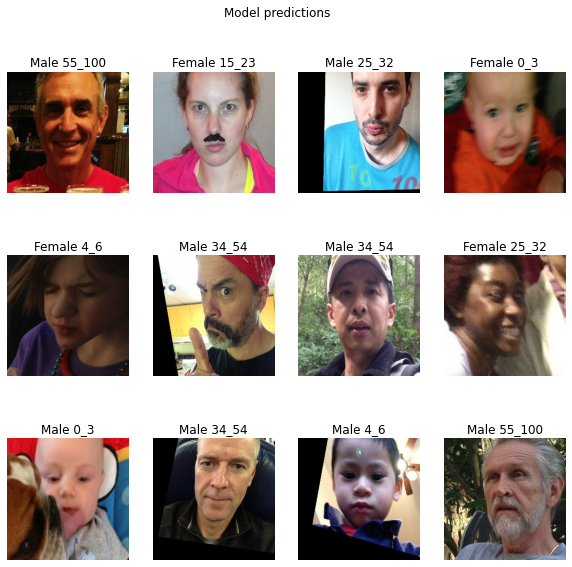

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
#plotting the predicted gender and age of the face on the image
for n in range(12):
  plt.subplot(3,4,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch_gender[n].title()+" "+predicted_label_batch_age[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")